In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import streamlit as st
from streamlit_option_menu import option_menu

In [75]:
pd.show_versions(as_json=False)


INSTALLED VERSIONS
------------------
commit           : 0f437949513225922d851e9581723d82120684a6
python           : 3.11.4.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
Version          : 10.0.19045
machine          : AMD64
processor        : Intel64 Family 6 Model 140 Stepping 1, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : English_Indonesia.1252

pandas           : 2.0.3
numpy            : 1.25.1
pytz             : 2023.3
dateutil         : 2.8.2
setuptools       : 65.5.0
pip              : 23.1.2
Cython           : None
pytest           : None
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : None
html5lib         : None
pymysql          : None
psycopg2         : None
jinja2           : 3.1.2
IPython          : 8.14.0
pandas_datareader: None
bs4              : 4.12.2
bottleneck       : None
brotli    

In [39]:
dt = pd.read_csv("D:\\BPK Perwakilan Provinsi Maluku\\DATC AKN VI\\Diversity Team\\daftar 2.csv",
                 sep=";", on_bad_lines="skip", encoding= 'unicode_escape')
dt.head()

,Nama,Jabatan,Unit Kerja,Gender,Strata Pendidikan S1,Jurusan,Strata Pendidikan S2,Jurusan.1,Tahun,Riwayat Entitas,Akun 1,Opini,Anggaran Pendapatan,Realisasi Pendaptan,Anggaran Belanja,Realisasi Belanja,Total Aset,Keikutsertaan,Unnamed: 18,Unnamed: 19
0,Ervin Rifian,Pemeriksa Ahli Muda/ Muda,Subauditorat Maluku I,Pria,S1,Akuntansi,S2,Manajemen,2020,Provinsi Maluku,NaN,WTP,3059108355912.01,"3,045,825,245,458.40","3,643,376,319,535.30",2780809725348,5799738610056,Tidak,NaN,NaN
1,Ervin Rifian,Pemeriksa Ahli Muda/ Muda,Subauditorat Maluku I,Pria,S1,Akuntansi,S2,Manajemen,2020,Pemerintah Kota Ambon,NaN,WDP,1275569386433.06,"1,146,467,282,588.07","1,176,341,175,499.06",1061974497974280,1628558830832,Tidak,NaN,NaN
2,Ervin Rifian,Pemeriksa Ahli Muda/ Muda,Subauditorat Maluku I,Pria,S1,Akuntansi,S2,Manajemen,2020,Seram Bagian Barat,NaN,WDP,990650719784.30,"963,960,442,197.30","915,874,231,313.27","830,810,205,367.40",1404147380287,Tidak,NaN,NaN
3,Ervin Rifian,Pemeriksa Ahli Muda/ Muda,Subauditorat Maluku I,Pria,S1,Akuntansi,S2,Manajemen,2020,Seram Bagian Timur,NaN,WDP,905328179780.00,"909,584,453,043.17","923,350,430,355.00","874,812,529,562.40",1867047187416,Tidak,NaN,NaN
4,Ervin Rifian,Pemeriksa Ahli Muda/ Muda,Subauditorat Maluku I,Pria,S1,Akuntansi,S2,Manajemen,2020,Kabupaten Buru,NaN,WTP,102301936737487,925426635511,877460252388,779219760251,1480600724702,Tidak,NaN,NaN


In [40]:
dt.drop(['Unnamed: 18','Unnamed: 19'], axis = 1, inplace = True)

In [41]:
dt['Nama'].value_counts()

Nama
Melisa Elfrida Situngkir                 60
Anthony Valentino Poluan                 60
Leonardo Amarduan                        60
Muhammad Taufiqurahman                   60
Mario Bayu Prasetya Putra                60
Anugerah Risky Agung Garuda Dipratama    60
Yusman Sumantri                          48
FARIDA HEMAS MARDIKAYANTI                48
Fuad Fauzi                               48
Ronald Dustin Kastanya                   48
MARDIANA LATIFAH                         48
DIO PRAM PERMADI                         48
FAJAR ADE PUTRA                          48
Indri Alvera S.Turnip                    48
FAJAR ALY                                48
FAIZAL TAUFIK IBRAHIM                    48
FIHARA FITRIANY                          48
GUPITA PERMATANINGAYU                    48
ANDREAN ARIF SUHANDA                     48
Mhd Nugraha Harahap                      48
SITI SANGADAH                            48
SYAKUR ADHI TYASMORO                     48
SAMUEL SITOMPUL            

In [42]:
dt = dt[dt['Nama'].isin(['Ervin Rifian','Fuad Fauzi', 'Melisa Elfrida Situngkir','Anugerah Risky Agung Garuda Dipratama',
                         'Mario Bayu Prasetya Putra','Yogi Yogaswara','Gusti Agung Diah Krisnawati','Indra Trijadi',
                         'Anthony Valentino Poluan','Irwan Wicaksono','Leonardo Amarduan','Mhd Nugraha Harahap',
                         'Yusman Sumantri'])]
dt['Nama'].value_counts()

Nama
Melisa Elfrida Situngkir                 60
Anugerah Risky Agung Garuda Dipratama    60
Mario Bayu Prasetya Putra                60
Anthony Valentino Poluan                 60
Leonardo Amarduan                        60
Fuad Fauzi                               48
Mhd Nugraha Harahap                      48
Yusman Sumantri                          48
Ervin Rifian                             36
Irwan Wicaksono                          36
Yogi Yogaswara                           24
Gusti Agung Diah Krisnawati              12
Indra Trijadi                            12
Name: count, dtype: int64

In [43]:
def data_characteristics(train):
    
    # displaying shape of the dataset
    print(f'Shape of the Dataset {train.shape}')
    print(f'Number of Columns in the Dataset {train.shape[1]}')
    print(f'Number of Rows in the Dataset {train.shape[0]}')
    
    # Understanding the Number of Numeric and Categorical features in dataset
    numeric_features = train.select_dtypes(include = [np.number])
    categoric_features = train.select_dtypes(exclude = [np.number])
    print("Number of Numerical Features : {}".format(numeric_features.shape[1]))
    print("Number of Categorical Features : {}".format(categoric_features.shape[1]))
    
    # Understanding the dataset
    print("Information of the Dataset : {}".format(train.info(verbose = False, memory_usage = "deep")))
    
data_characteristics(dt)
# Statistical Summary of the dataset
print("Statistical Summary of the Dataset : ")
dt.describe(include = "all").transpose()

Shape of the Dataset (564, 18)
Number of Columns in the Dataset 18
Number of Rows in the Dataset 564
Number of Numerical Features : 1
Number of Categorical Features : 17
<class 'pandas.core.frame.DataFrame'>
Index: 564 entries, 0 to 1883
Columns: 18 entries, Nama to Keikutsertaan
dtypes: int64(1), object(17)
memory usage: 617.8 KB
Information of the Dataset : None
Statistical Summary of the Dataset : 


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Nama,564,13,Melisa Elfrida Situngkir,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jabatan,564,2,Pemeriksa Ahli Pertama/ Pertama,396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unit Kerja,564,2,Subauditorat Maluku I,288,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,564,2,Pria,492,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Strata Pendidikan S1,564,1,S1,564,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jurusan,564,4,Akuntansi,324,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Strata Pendidikan S2,144,1,S2,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jurusan.1,144,3,Akuntansi,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tahun,564.0,NaN,NaN,NaN,2020.255319,1.39221,2018.0,2019.0,2020.0,2022.0,2022.0
Riwayat Entitas,564,12,Provinsi Maluku,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Convert to Numeric

In [44]:
dt['Anggaran Pendapatan'] = dt['Anggaran Pendapatan'].str.replace(".","")
dt['Anggaran Pendapatan'] = dt['Anggaran Pendapatan'].str.replace(",","")
dt['Anggaran Pendapatan'] = pd.to_numeric(dt['Anggaran Pendapatan'])

dt['Realisasi Pendaptan'] = dt['Realisasi Pendaptan'].str.replace(".","")
dt['Realisasi Pendaptan'] = dt['Realisasi Pendaptan'].str.replace(",","")
dt['Realisasi Pendaptan'] = dt['Realisasi Pendaptan'].astype(float)

dt['Realisasi Belanja'] = dt['Realisasi Belanja'].str.replace(".","")
dt['Realisasi Belanja'] = dt['Realisasi Belanja'].str.replace(",","")
dt['Realisasi Belanja'] = pd.to_numeric(dt['Realisasi Belanja'])

dt['Total Aset'] = dt['Total Aset'].str.replace(".","")
dt['Total Aset'] = dt['Total Aset'].str.replace(",","")
dt['Total Aset'] = dt['Total Aset'].str.replace(' ','')
dt['Total Aset'] = pd.to_numeric(dt['Total Aset'])

dt['Anggaran Belanja'] = dt['Anggaran Belanja'].str.replace(".","")
dt['Anggaran Belanja'] = dt['Anggaran Belanja'].str.replace(",","")
dt['Anggaran Belanja'] = dt['Anggaran Belanja'].str.replace(" ",'')
dt['Anggaran Belanja'] = dt['Anggaran Belanja'].astype(float)

In [45]:
def data_characteristics(train):
    
    # displaying shape of the dataset
    print(f'Shape of the Dataset {train.shape}')
    print(f'Number of Columns in the Dataset {train.shape[1]}')
    print(f'Number of Rows in the Dataset {train.shape[0]}')
    
    # Understanding the Number of Numeric and Categorical features in dataset
    numeric_features = train.select_dtypes(include = [np.number])
    categoric_features = train.select_dtypes(exclude = [np.number])
    print("Number of Numerical Features : {}".format(numeric_features.shape[1]))
    print("Number of Categorical Features : {}".format(categoric_features.shape[1]))
    
    # Understanding the dataset
    print("Information of the Dataset : {}".format(train.info(verbose = False, memory_usage = "deep")))
    
data_characteristics(dt)
# Statistical Summary of the dataset
print("Statistical Summary of the Dataset : ")
dt.describe(include = "all").transpose()

Shape of the Dataset (564, 18)
Number of Columns in the Dataset 18
Number of Rows in the Dataset 564
Number of Numerical Features : 6
Number of Categorical Features : 12
<class 'pandas.core.frame.DataFrame'>
Index: 564 entries, 0 to 1883
Columns: 18 entries, Nama to Keikutsertaan
dtypes: float64(2), int64(4), object(12)
memory usage: 442.7 KB
Information of the Dataset : None
Statistical Summary of the Dataset : 


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Nama,564,13,Melisa Elfrida Situngkir,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jabatan,564,2,Pemeriksa Ahli Pertama/ Pertama,396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unit Kerja,564,2,Subauditorat Maluku I,288,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,564,2,Pria,492,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Strata Pendidikan S1,564,1,S1,564,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jurusan,564,4,Akuntansi,324,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Strata Pendidikan S2,144,1,S2,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jurusan.1,144,3,Akuntansi,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tahun,564.0,NaN,NaN,NaN,2020.255319,1.39221,2018.0,2019.0,2020.0,2022.0,2022.0
Riwayat Entitas,564,12,Provinsi Maluku,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
dt['Strata_Pendidikan'] = np.where(dt['Strata Pendidikan S2']=='S2', 'S2', 'S1')

In [47]:
dt.columns = dt.columns.str.replace(' ','_')

In [48]:
dt.columns

Index(['Nama', 'Jabatan', 'Unit_Kerja', 'Gender', 'Strata_Pendidikan_S1',
       'Jurusan', 'Strata_Pendidikan_S2', 'Jurusan.1', 'Tahun',
       'Riwayat_Entitas', 'Akun_1', 'Opini', 'Anggaran_Pendapatan',
       'Realisasi_Pendaptan', 'Anggaran_Belanja', 'Realisasi_Belanja',
       'Total_Aset', 'Keikutsertaan', 'Strata_Pendidikan'],
      dtype='object')

In [49]:
dt = dt[['Nama','Gender','Jurusan','Strata_Pendidikan','Riwayat_Entitas','Opini','Anggaran_Pendapatan',
       'Realisasi_Pendaptan', 'Anggaran_Belanja', 'Realisasi_Belanja',
       'Total_Aset']]
dt.head()

,Nama,Gender,Jurusan,Strata_Pendidikan,Riwayat_Entitas,Opini,Anggaran_Pendapatan,Realisasi_Pendaptan,Anggaran_Belanja,Realisasi_Belanja,Total_Aset
0,Ervin Rifian,Pria,Akuntansi,S2,Provinsi Maluku,WTP,305910835591201,3.045825e+14,3.643376e+14,2780809725348,5799738610056
1,Ervin Rifian,Pria,Akuntansi,S2,Pemerintah Kota Ambon,WDP,127556938643306,1.146467e+14,1.176341e+14,1061974497974280,1628558830832
2,Ervin Rifian,Pria,Akuntansi,S2,Seram Bagian Barat,WDP,99065071978430,9.639604e+13,9.158742e+13,83081020536740,1404147380287
3,Ervin Rifian,Pria,Akuntansi,S2,Seram Bagian Timur,WDP,90532817978000,9.095845e+13,9.233504e+13,87481252956240,1867047187416
4,Ervin Rifian,Pria,Akuntansi,S2,Kabupaten Buru,WTP,102301936737487,9.254266e+11,8.774603e+11,779219760251,1480600724702


In [50]:
list_item = []
for col in dt.columns:
    list_item.append([col, dt[col].dtype, dt[col].isna().sum(), round((dt[col].isna().sum()/len(dt[col]))*100,2),
                      dt[col].nunique(), list(dt[col].sample(5).drop_duplicates().values)])

dfDesc = pd.DataFrame(columns=['features', 'data_type', 'null', 'nulPct', 'unique', 'uniqueSample'],data=list_item)
dfDesc

,features,data_type,null,nulPct,unique,uniqueSample
0,Nama,object,0,0.0,13,"[Leonardo Amarduan, Anthony Valentino Poluan, ..."
1,Gender,object,0,0.0,2,[Pria]
2,Jurusan,object,0,0.0,4,"[Akuntansi, Teknik Informatika]"
3,Strata_Pendidikan,object,0,0.0,2,"[S1, S2]"
4,Riwayat_Entitas,object,0,0.0,12,"[Kabupaten Tanimbar, Kepulauan Aru, Kabupaten ..."
5,Opini,object,0,0.0,3,"[WTP, WDP, TMP]"
6,Anggaran_Pendapatan,int64,0,0.0,64,"[347934043242761, 777779906000, 566390177799, ..."
7,Realisasi_Pendaptan,float64,0,0.0,61,"[899119207893.0, 95015928943639.0, 16223308333..."
8,Anggaran_Belanja,float64,0,0.0,61,"[877460252388.0, 889478864035.0, 798408468555...."
9,Realisasi_Belanja,int64,0,0.0,61,"[770593548268, 725529948575, 830589206964, 549..."


C:\Users\Administrator\AppData\Local\Temp\ipykernel_20072\1443297621.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(8,1, i)


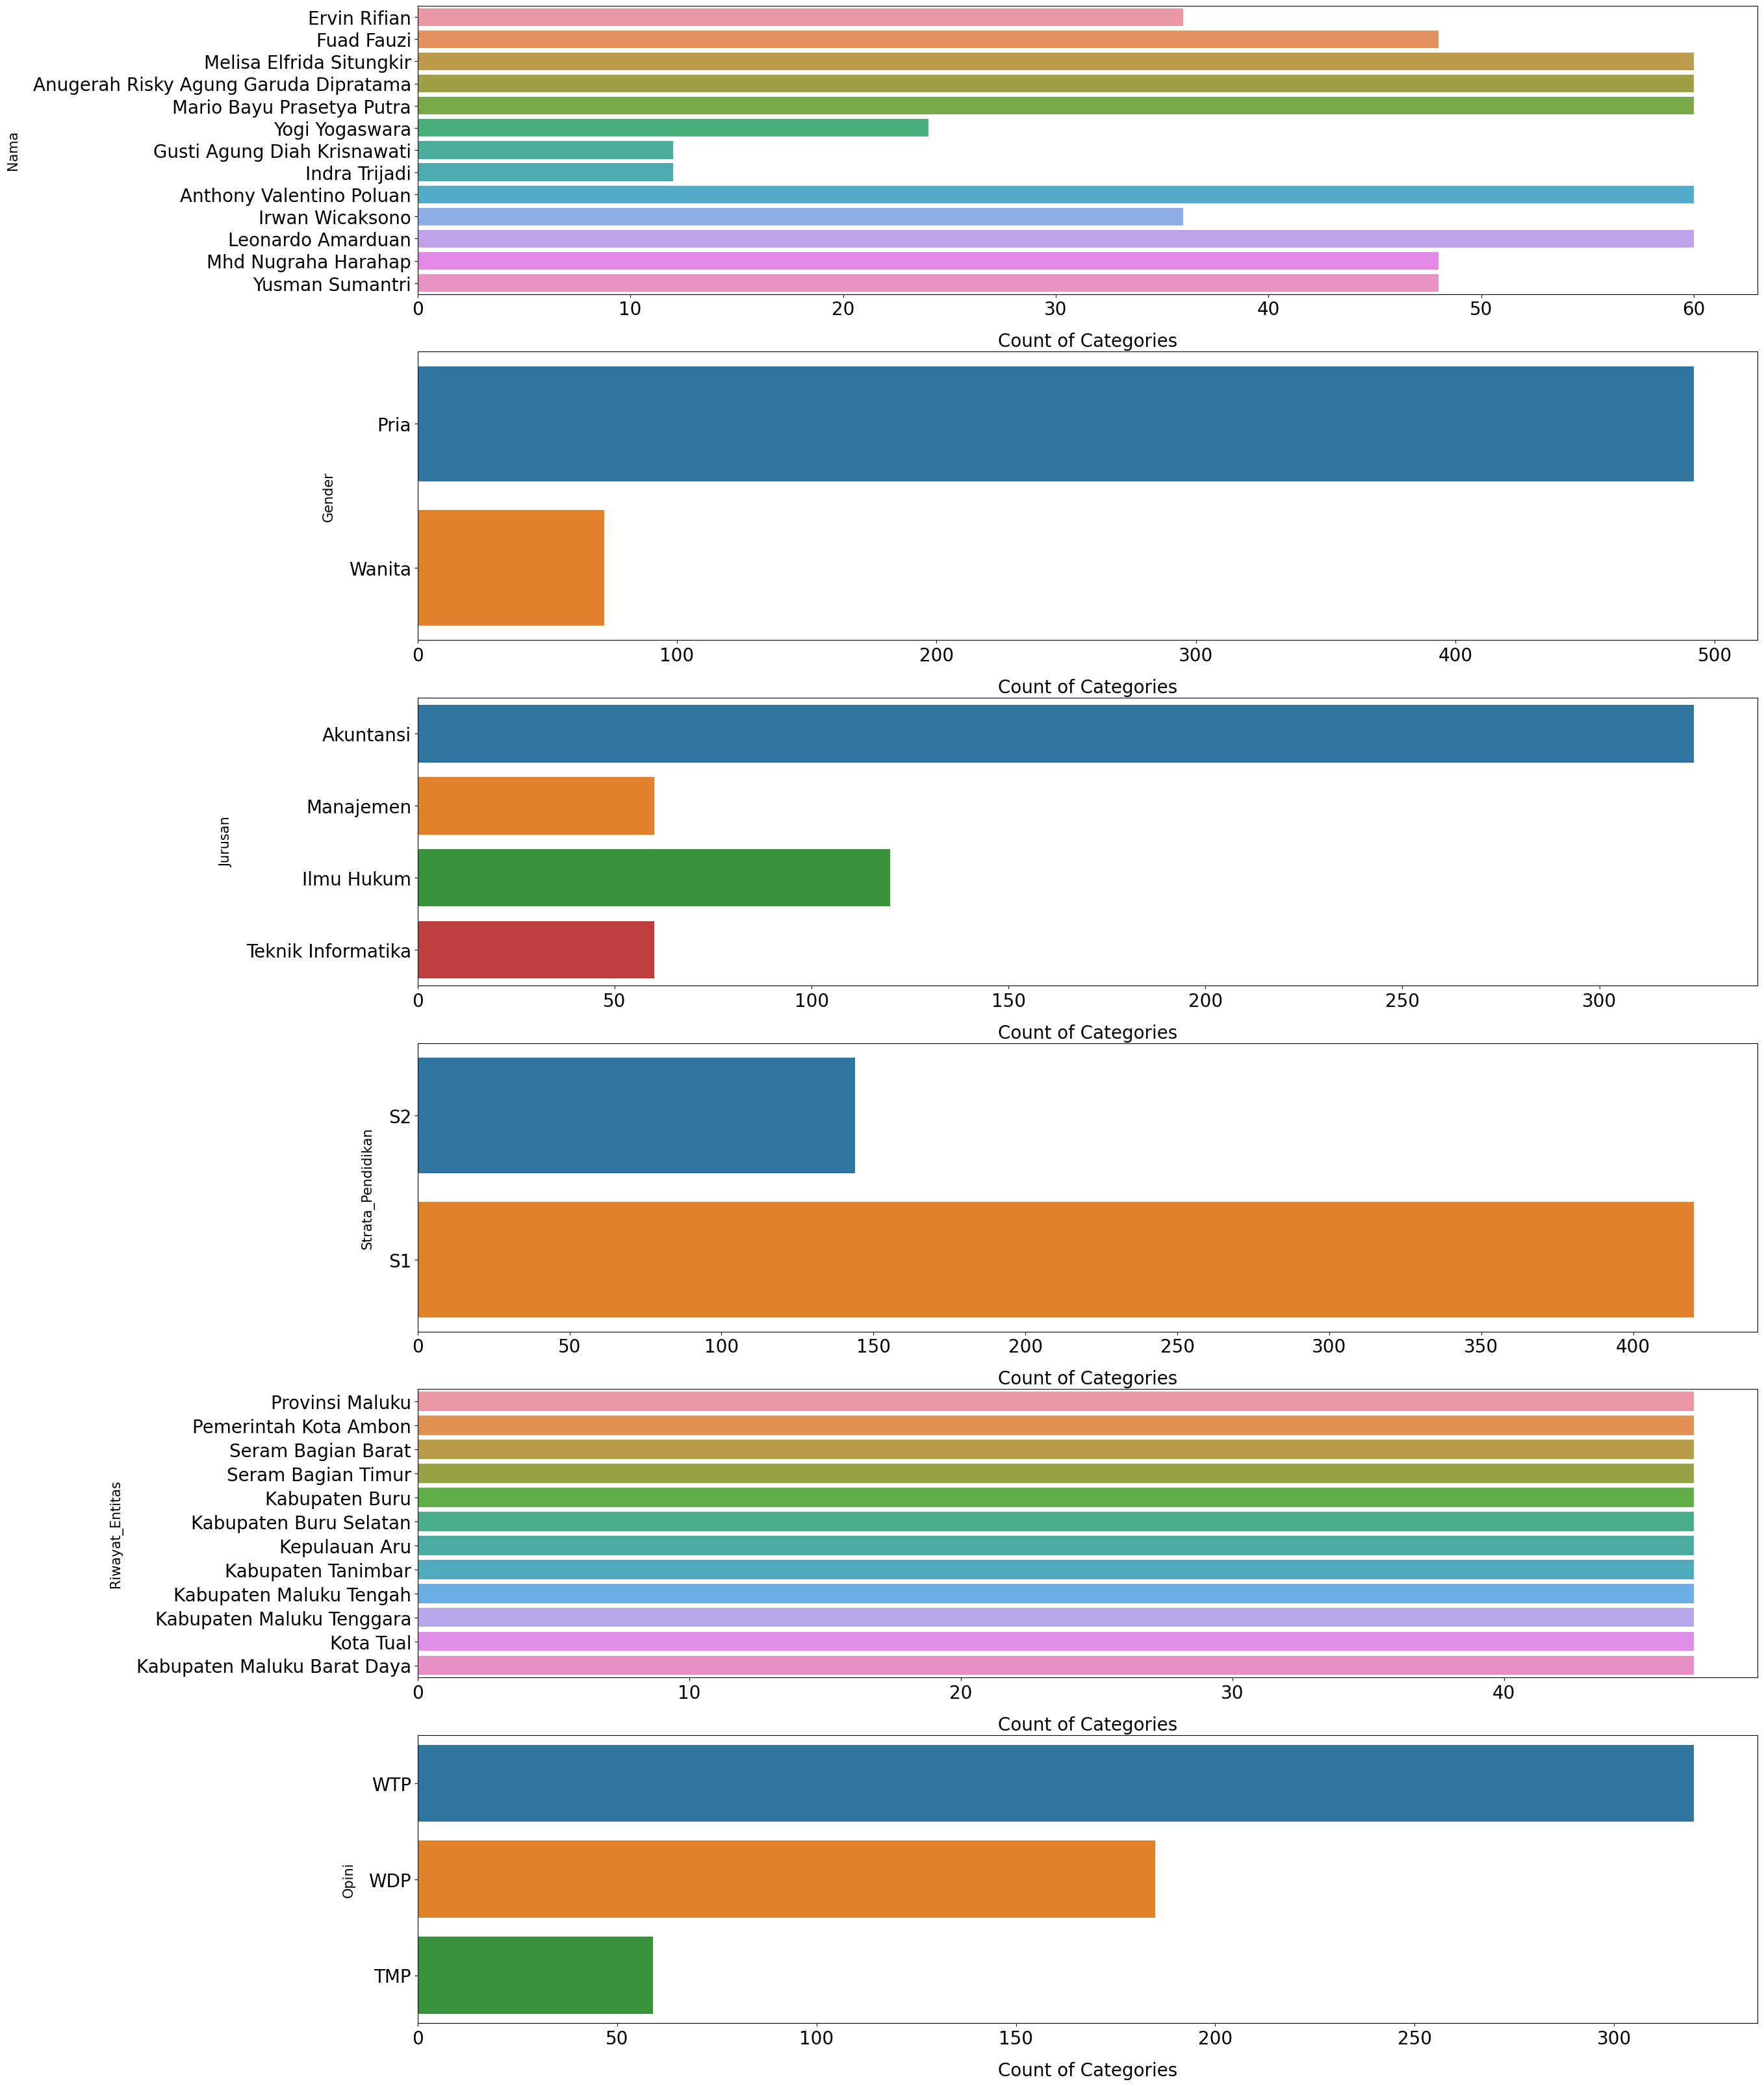

In [51]:
import matplotlib.pyplot as plt
num_features = ['Nama','Gender','Jurusan','Strata_Pendidikan','Riwayat_Entitas','Opini']

fig, axs  = plt.subplots(figsize = (15,30)) #(lebar, tinggi)
plt.subplots_adjust(right = 1.5, top = 1.5)

for i, feature in enumerate(num_features, 1):
    plt.subplot(8,1, i)
    sns.countplot(y = feature, data = dt)
    
    plt.ylabel('{}'.format(feature), size = 15, labelpad = 15)
    plt.xlabel('Count of Categories', size = 20, labelpad = 15)
    plt.tick_params(axis = 'x', labelsize = 20)
    plt.tick_params(axis = 'y', labelsize = 20)
    
#     plt.title('Count of Target in {} Feature'.format(feature), size = 20, y = 1.05)

       Anggaran_Pendapatan  Realisasi_Pendaptan  Anggaran_Belanja  \
count         5.640000e+02         5.640000e+02      5.640000e+02   
mean          5.767936e+13         5.319072e+13      5.755244e+13   
std           9.197341e+13         8.870609e+13      9.979480e+13   
min           5.663902e+11         5.462061e+11      3.404405e+11   
25%           9.289264e+11         8.477206e+11      8.894789e+11   
50%           1.064673e+12         9.384802e+11      1.068929e+12   
75%           9.960305e+13         9.832804e+13      9.994172e+13   
max           3.479340e+14         3.268117e+14      4.154801e+14   

       Realisasi_Belanja    Total_Aset  
count       5.640000e+02  5.640000e+02  
mean        3.919867e+13  3.309496e+13  
std         1.475356e+14  9.360227e+13  
min         7.379933e+10  1.217123e+12  
25%         7.643967e+11  1.545150e+12  
50%         9.126291e+11  1.724075e+12  
75%         1.697990e+12  2.590197e+12  
max         1.061974e+15  5.188783e+14  

Distribu

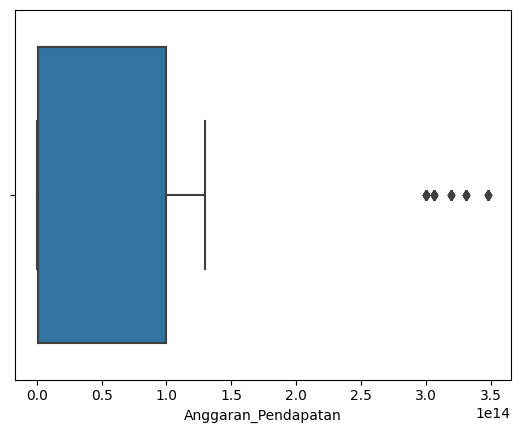

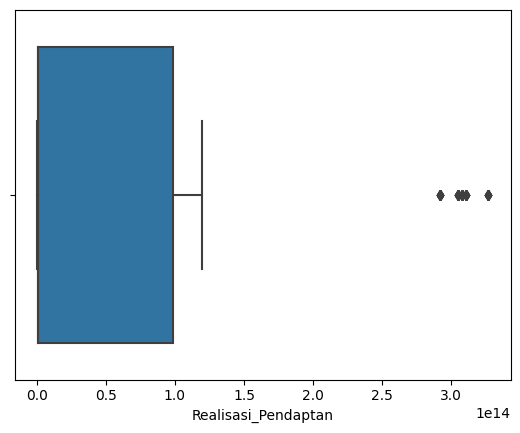

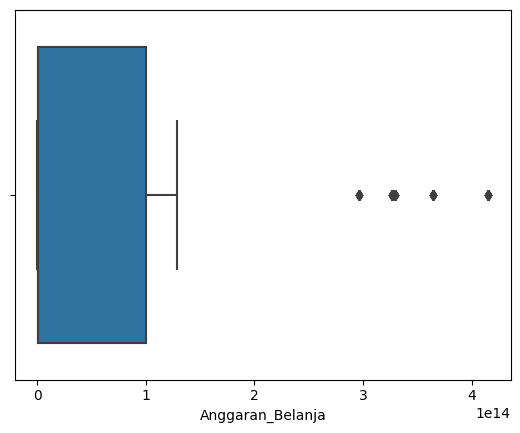

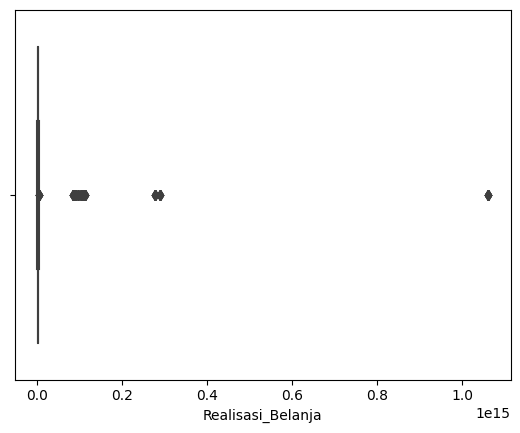

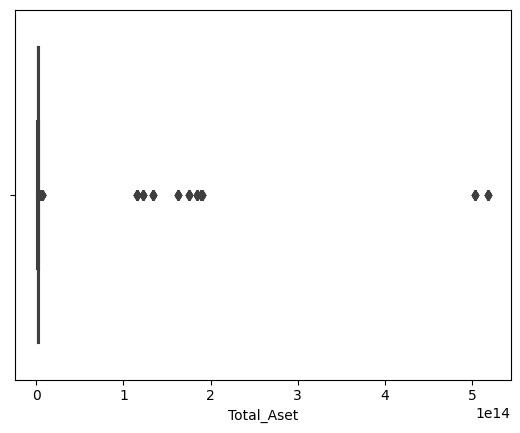

In [52]:
def outlier_checking(dt):
    
    col = ['Anggaran_Pendapatan',
       'Realisasi_Pendaptan', 'Anggaran_Belanja', 'Realisasi_Belanja',
       'Total_Aset']
    print(dt[col].describe())
    
    print('\nDistribution of data before being handled by Outliers: ')
    # checking the distribution of features of the dataset
    for i in col:
        plt.figure() # untuk membuat figure baru
        sns.boxplot(x=dt[i])
        plt.show()
    
outlier_checking(dt)

In [53]:
col = ['Anggaran_Pendapatan',
       'Realisasi_Pendaptan', 'Anggaran_Belanja', 'Realisasi_Belanja',
       'Total_Aset']

Q1 = dt[col].quantile(0.25)
Q3 = dt[col].quantile(0.75)

IQR = Q3 - Q1

# Extreme Outliers
minimum = Q1 - (IQR*3)
print(f'minimum value for each variable are: \n {minimum}')
maksimum = Q3 + (IQR*3)
print(f'maksimum value for each variable are: \n {maksimum}')

minimum value for each variable are: 
 Anggaran_Pendapatan   -2.950934e+14
Realisasi_Pendaptan   -2.915932e+14
Anggaran_Belanja      -2.962673e+14
Realisasi_Belanja     -2.036382e+12
Total_Aset            -1.589993e+12
dtype: float64
maksimum value for each variable are: 
 Anggaran_Pendapatan    3.956254e+14
Realisasi_Pendaptan    3.907690e+14
Anggaran_Belanja       3.970985e+14
Realisasi_Belanja      4.498769e+12
Total_Aset             5.725340e+12
dtype: float64


In [54]:
dt.loc[dt['Anggaran_Pendapatan']<0, 'Anggaran_Pendapatan'] = 0
dt.loc[dt['Realisasi_Pendaptan']<0, 'Realisasi_Pendaptan'] = 0
dt.loc[dt['Anggaran_Belanja']<0, 'Anggaran_Belanja'] = 0
dt.loc[dt['Realisasi_Belanja']<0, 'Realisasi_Belanja'] = 0
dt.loc[dt['Total_Aset']<0, 'Total_Aset'] = 0



In [55]:
from sklearn import preprocessing 
category_col = ['Nama','Gender','Jurusan','Strata_Pendidikan','Riwayat_Entitas','Opini']
labelEncoder = preprocessing.LabelEncoder() 
  
mapping_dict ={} 
for col in category_col: 
    dt[col] = labelEncoder.fit_transform(dt[col]) 
  
    le_name_mapping = dict(zip(labelEncoder.classes_, 
                        labelEncoder.transform(labelEncoder.classes_))) 
  
    mapping_dict[col]= le_name_mapping 
print(mapping_dict)

{'Nama': {'Anthony Valentino Poluan': 0, 'Anugerah Risky Agung Garuda Dipratama': 1, 'Ervin Rifian': 2, 'Fuad Fauzi': 3, 'Gusti Agung Diah Krisnawati': 4, 'Indra Trijadi': 5, 'Irwan Wicaksono': 6, 'Leonardo Amarduan': 7, 'Mario Bayu Prasetya Putra': 8, 'Melisa Elfrida Situngkir': 9, 'Mhd Nugraha Harahap': 10, 'Yogi Yogaswara': 11, 'Yusman Sumantri': 12}, 'Gender': {'Pria': 0, 'Wanita': 1}, 'Jurusan': {'Akuntansi': 0, 'Ilmu Hukum': 1, 'Manajemen': 2, 'Teknik Informatika': 3}, 'Strata_Pendidikan': {'S1': 0, 'S2': 1}, 'Riwayat_Entitas': {'Kabupaten Buru': 0, 'Kabupaten Buru Selatan': 1, 'Kabupaten Maluku Barat Daya': 2, 'Kabupaten Maluku Tengah': 3, 'Kabupaten Maluku Tenggara': 4, 'Kabupaten Tanimbar': 5, 'Kepulauan Aru': 6, 'Kota Tual': 7, 'Pemerintah Kota Ambon': 8, 'Provinsi Maluku': 9, 'Seram Bagian Barat': 10, 'Seram Bagian Timur': 11}, 'Opini': {'TMP': 0, 'WDP': 1, 'WTP': 2}}


In [56]:
dt.head()

,Nama,Gender,Jurusan,Strata_Pendidikan,Riwayat_Entitas,Opini,Anggaran_Pendapatan,Realisasi_Pendaptan,Anggaran_Belanja,Realisasi_Belanja,Total_Aset
0,2,0,0,1,9,2,305910835591201,3.045825e+14,3.643376e+14,2780809725348,5799738610056
1,2,0,0,1,8,1,127556938643306,1.146467e+14,1.176341e+14,1061974497974280,1628558830832
2,2,0,0,1,10,1,99065071978430,9.639604e+13,9.158742e+13,83081020536740,1404147380287
3,2,0,0,1,11,1,90532817978000,9.095845e+13,9.233504e+13,87481252956240,1867047187416
4,2,0,0,1,0,2,102301936737487,9.254266e+11,8.774603e+11,779219760251,1480600724702


In [57]:
from sklearn.model_selection import train_test_split

x = dt.drop('Nama', axis = 1)
y = dt['Nama']

from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler(feature_range = (0, 1))
# X = scaler.fit_transform(x)

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=42)

print('Jumlah baris dan kolom dari x_train adalah:', X_train.shape,', sedangkan Jumlah baris dan kolom dari y_train adalah:', Y_train.shape)
print('Prosentase Churn di data Training adalah:')
print(Y_train.value_counts(normalize=True))
print('Jumlah baris dan kolom dari x_test adalah:', X_test.shape,', sedangkan Jumlah baris dan kolom dari y_test adalah:', Y_test.shape)
print('Prosentase Churn di data Testing adalah:')
print(Y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari x_train adalah: (423, 10) , sedangkan Jumlah baris dan kolom dari y_train adalah: (423,)
Prosentase Churn di data Training adalah:
Nama
7     0.118203
0     0.108747
9     0.106383
1     0.106383
8     0.101655
10    0.094563
12    0.073286
3     0.073286
6     0.066194
2     0.059102
11    0.044917
4     0.023641
5     0.023641
Name: proportion, dtype: float64
Jumlah baris dan kolom dari x_test adalah: (141, 10) , sedangkan Jumlah baris dan kolom dari y_test adalah: (141,)
Prosentase Churn di data Testing adalah:
Nama
12    0.120567
8     0.120567
3     0.120567
1     0.106383
9     0.106383
0     0.099291
2     0.078014
7     0.070922
10    0.056738
6     0.056738
11    0.035461
5     0.014184
4     0.014184
Name: proportion, dtype: float64


In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, recall_score, precision_score

# fit the model
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logreg.fit(X_train, Y_train)

# make prediction
train_pred_log = logreg.predict(X_train)
pred_log = logreg.predict(X_test)

cm_log_train = confusion_matrix(Y_train, train_pred_log)
cm_log = confusion_matrix(Y_test, pred_log )


print('=============== CLASSIFICATION REPORT LOGISTIC REGRESSION FOR TRAINING DATA ===============')
print(classification_report(Y_train, train_pred_log))
print()
# tn, fp, fn, tp = confusion_matrix(Y_train, train_pred_log).ravel()
# print('tn : ',tn, ' fp : ',fp,' fn : ' ,fn,' tp : ' ,tp)

print('=============== CLASSIFICATION REPORT LOGISTIC REGRESSION FOR TESTING DATA ===============')
print(classification_report(Y_test,pred_log))
print()
# tn, fp, fn, tp = confusion_matrix(Y_test,pred_log).ravel()
# print('tn : ',tn, ' fp : ',fp,' fn : ' ,fn,' tp : ' ,tp)

=============== CLASSIFICATION REPORT LOGISTIC REGRESSION FOR TRAINING DATA ===============
              precision    recall  f1-score   support

           0       0.11      0.09      0.10        46
           1       0.00      0.00      0.00        45
           2       0.22      0.08      0.12        25
           3       0.13      0.23      0.16        31
           4       0.00      0.00      0.00        10
           5       0.12      0.10      0.11        10
           6       0.08      0.07      0.07        28
           7       0.16      0.14      0.15        50
           8       0.18      0.05      0.07        43
           9       0.00      0.00      0.00        45
          10       0.11      0.57      0.18        40
          11       0.00      0.00      0.00        19
          12       0.12      0.03      0.05        31

    accuracy                           0.12       423
   macro avg       0.09      0.10      0.08       423
weighted avg       0.10      0.12      0.0

C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: Undefi

In [60]:
# fit the model
pk = DecisionTreeClassifier()
pk.fit(X_train, Y_train)

# make prediction
train_pred_dt = pk.predict(X_train)
pred_dt = pk.predict(X_test)

cm_dt_train = confusion_matrix(Y_train, train_pred_dt)
cm_dt = confusion_matrix(Y_test, pred_dt)


print('=============== CLASSIFICATION REPORT DECISION TREE FOR TESTING DATA ===============')
print(classification_report(Y_train, train_pred_dt))
print()

print('=============== CLASSIFICATION REPORT DECISION TREE FOR TESTING DATA ===============')
print(classification_report(Y_test,pred_dt))
print()

=============== CLASSIFICATION REPORT DECISION TREE FOR TESTING DATA ===============
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        45
           2       0.58      1.00      0.74        25
           3       0.40      1.00      0.57        31
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        10
           6       1.00      0.36      0.53        28
           7       0.65      1.00      0.79        50
           8       0.46      0.44      0.45        43
           9       1.00      1.00      1.00        45
          10       0.67      0.20      0.31        40
          11       1.00      0.11      0.19        19
          12       1.00      0.13      0.23        31

    accuracy                           0.72       423
   macro avg       0.83      0.71      0.68       423
weighted avg       0.80      0.72      0.68      

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

gbt = GradientBoostingClassifier().fit(X_train, Y_train)

# make prediction
train_pred_gbt = gbt.predict(X_train)
pred_gbt = gbt.predict(X_test)

cm_gbt_train = confusion_matrix(Y_train, train_pred_gbt)
cm_gbt = confusion_matrix(Y_test, pred_gbt)

print('=============== CLASSIFICATION REPORT GRADIENT BOOSTING FOR TRAINING DATA ===============')
print(classification_report(Y_train, train_pred_gbt))
print()

print('=============== CLASSIFICATION REPORT GRADIENT BOOSTING FOR TESTING DATA ===============')
print(classification_report(Y_test,pred_gbt))
print()

=============== CLASSIFICATION REPORT GRADIENT BOOSTING FOR TRAINING DATA ===============
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        45
           2       0.71      0.48      0.57        25
           3       0.47      0.29      0.36        31
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        10
           6       0.64      0.82      0.72        28
           7       0.69      0.82      0.75        50
           8       0.40      0.49      0.44        43
           9       1.00      1.00      1.00        45
          10       0.47      0.60      0.53        40
          11       0.55      0.32      0.40        19
          12       0.59      0.42      0.49        31

    accuracy                           0.72       423
   macro avg       0.73      0.71      0.71       423
weighted avg       0.72      0.72      0.71 

In [62]:
from xgboost import XGBClassifier
from sklearn.metrics import top_k_accuracy_score

xgb = XGBClassifier(eta = 0.005, max_depth = 4, reg_lambda = 3).fit(X_train, Y_train)

# make prediction
train_pred_xgb = xgb.predict(X_train)
pred_xgb = xgb.predict(X_test)
pred_xgb_prob = xgb.predict_proba(X_test)

cm_xgb_train = confusion_matrix(Y_train, train_pred_xgb)
cm_xgb= confusion_matrix(Y_test, pred_xgb)


print('=============== CLASSIFICATION REPORT EXTREME GRADIENT BOOSTING FOR TRAINING DATA ===============')
print(classification_report(Y_train, train_pred_xgb))
print()

print('=============== CLASSIFICATION REPORT EXTREME GRADIENT BOOSTING FOR TESTING DATA ===============')
print(classification_report(Y_test,pred_xgb))
print()

=============== CLASSIFICATION REPORT EXTREME GRADIENT BOOSTING FOR TRAINING DATA ===============
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        45
           2       0.00      0.00      0.00        25
           3       0.00      0.00      0.00        31
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        10
           6       0.53      1.00      0.69        28
           7       0.62      1.00      0.76        50
           8       0.37      0.33      0.35        43
           9       1.00      1.00      1.00        45
          10       0.36      0.85      0.50        40
          11       0.00      0.00      0.00        19
          12       0.00      0.00      0.00        31

    accuracy                           0.67       423
   macro avg       0.53      0.63      0.56       423
weighted avg       0.55      0.67   

C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [63]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=101).fit(X_train, Y_train)

# make prediction
train_pred_xgb = xgb.predict(X_train)
pred_xgb = xgb.predict(X_test)

cm_xgb_train = confusion_matrix(Y_train, train_pred_xgb)
cm_xgb= confusion_matrix(Y_test, pred_xgb)


print('=============== CLASSIFICATION REPORT EXTREME GRADIENT BOOSTING FOR TRAINING DATA ===============')
print(classification_report(Y_train, train_pred_xgb))
print()

print('=============== CLASSIFICATION REPORT EXTREME GRADIENT BOOSTING FOR TESTING DATA ===============')
print(classification_report(Y_test,pred_xgb))
print()

=============== CLASSIFICATION REPORT EXTREME GRADIENT BOOSTING FOR TRAINING DATA ===============
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        45
           2       0.67      0.56      0.61        25
           3       0.45      0.29      0.35        31
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        10
           6       0.66      0.75      0.70        28
           7       0.66      0.96      0.78        50
           8       0.42      0.56      0.48        43
           9       1.00      1.00      1.00        45
          10       0.47      0.57      0.52        40
          11       0.57      0.21      0.31        19
          12       0.75      0.19      0.31        31

    accuracy                           0.72       423
   macro avg       0.74      0.70      0.70       423
weighted avg       0.73      0.72   

In [64]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier().fit(X_train, Y_train)

# make prediction
train_pred_gbt = knn.predict(X_train)
pred_gbt = knn.predict(X_test)

cm_gbt_train = confusion_matrix(Y_train, train_pred_gbt)
cm_gbt = confusion_matrix(Y_test, pred_gbt)


print('=============== CLASSIFICATION REPORT EXTREME GRADIENT BOOSTING FOR TESTING DATA ===============')
print(classification_report(Y_train, train_pred_gbt))
print()

print('=============== CLASSIFICATION REPORT EXTREME GRADIENT BOOSTING FOR TESTING DATA ===============')
print(classification_report(Y_test,pred_gbt))
print()

=============== CLASSIFICATION REPORT EXTREME GRADIENT BOOSTING FOR TESTING DATA ===============
              precision    recall  f1-score   support

           0       0.47      0.96      0.63        46
           1       0.12      0.24      0.16        45
           2       0.22      0.96      0.36        25
           3       0.24      0.65      0.35        31
           4       0.43      0.90      0.58        10
           5       0.10      0.10      0.10        10
           6       0.11      0.04      0.05        28
           7       0.25      0.02      0.04        50
           8       0.00      0.00      0.00        43
           9       0.00      0.00      0.00        45
          10       0.00      0.00      0.00        40
          11       0.00      0.00      0.00        19
          12       0.00      0.00      0.00        31

    accuracy                           0.26       423
   macro avg       0.15      0.30      0.17       423
weighted avg       0.14      0.26    

C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier

def SMOTE_eval_method(features,target,model):
    
#     X_train, X_test, y_train, y_test = train_test_split(X_traain, target,test_size=0.2,random_state=101)
#     sm = SMOTE(random_state=42)
#     X_sm, y_sm = sm.fit_resample(X_train,Y_train)
    
    classifcation = model()
    classifcation.fit(X_train,Y_train)
        
    ## For describe model underfitting or Overfitting
    prediction_train = classifcation.predict(X_train)
    prediction_test = classifcation.predict(X_test)
    
    # Evaluation Model Train After SMOTE
    accuracy_train = accuracy_score(Y_train,prediction_train)
#     f1_train = f1_score(Y_train,prediction_train)
#     recall_train = recall_score(Y_train,prediction_train)
#     precision_train = precision_score(Y_train,prediction_train)
    
    # Evaluation Model Data Test After SMOTE 
    accuracy_test = accuracy_score(Y_test,prediction_test)
#     f1_test = f1_score(Y_test,prediction_test)
#     recall_test = recall_score(Y_test,prediction_test)
#     precision_test = precision_score(Y_test,prediction_test)
    
    all_score = [accuracy_train,accuracy_test]
    return all_score

all_score=[]
best_algorithm = [LogisticRegression,DecisionTreeClassifier,RandomForestClassifier, GradientBoostingClassifier,
             XGBClassifier, GaussianNB, KNeighborsClassifier, AdaBoostClassifier, SGDClassifier]

for item in best_algorithm :
    score = SMOTE_eval_method(X_train,X_test,item)
    all_score.append(score)
    
df_score = pd.DataFrame(all_score,index=['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier', 
                                     'GradientBoostingClassifier','XGBClassifier', 'GaussianNB',
                                        'KNeighborsClassifier', 'AdaBoostClassifier', 'SGDClassifier'],
                        columns=['accuracy_train','accuracy_test'])
df_score

C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,accuracy_train,accuracy_test
LogisticRegression,0.115839,0.063830
DecisionTreeClassifier,0.721040,0.404255
RandomForestClassifier,0.721040,0.397163
GradientBoostingClassifier,0.721040,0.397163
XGBClassifier,0.721040,0.397163
GaussianNB,0.061466,0.028369
KNeighborsClassifier,0.262411,0.000000
AdaBoostClassifier,0.423168,0.347518
SGDClassifier,0.106383,0.099291


In [66]:
from xgboost import XGBClassifier
from sklearn.metrics import top_k_accuracy_score

xgb = XGBClassifier(eta = 0.005, max_depth = 4, reg_lambda = 3).fit(X_train, Y_train)

# make prediction
train_pred_xgb = xgb.predict(X_train)
pred_xgb = xgb.predict(X_test)
pred_xgb_prob = xgb.predict_proba(X_test)

cm_xgb_train = confusion_matrix(Y_train, train_pred_xgb)
cm_xgb= confusion_matrix(Y_test, pred_xgb)


print('=============== CLASSIFICATION REPORT EXTREME GRADIENT BOOSTING FOR TRAINING DATA ===============')
print(classification_report(Y_train, train_pred_xgb))
print()

print('=============== CLASSIFICATION REPORT EXTREME GRADIENT BOOSTING FOR TESTING DATA ===============')
print(classification_report(Y_test,pred_xgb))
print()

top_k_accuracy_score(list(Y_test), pred_xgb_prob, k=3, labels=list(range(13)))

=============== CLASSIFICATION REPORT EXTREME GRADIENT BOOSTING FOR TRAINING DATA ===============
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        45
           2       0.00      0.00      0.00        25
           3       0.00      0.00      0.00        31
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        10
           6       0.53      1.00      0.69        28
           7       0.62      1.00      0.76        50
           8       0.37      0.33      0.35        43
           9       1.00      1.00      1.00        45
          10       0.36      0.85      0.50        40
          11       0.00      0.00      0.00        19
          12       0.00      0.00      0.00        31

    accuracy                           0.67       423
   macro avg       0.53      0.63      0.56       423
weighted avg       0.55      0.67   

C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

0.9078014184397163

In [67]:
import pickle

filename = 'model_pembentukan_ketua_tim.sav'
pickle.dump(gbt , open(filename, 'wb'))